# Illustrating local test graph types

In [1]:
# import sys
# sys.path.append('..')

import methods.torch_nvd as nvd
import methods.utils as utils

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import networkx as nx

import scipy.stats as st

In [2]:
local_tests = [('Chains', nx.path_graph), 
                ('Complete', nx.complete_graph),
                ('Communities', utils.make_community_graph)]

num_nodes_range = [6,8,10,12]

Figure saved


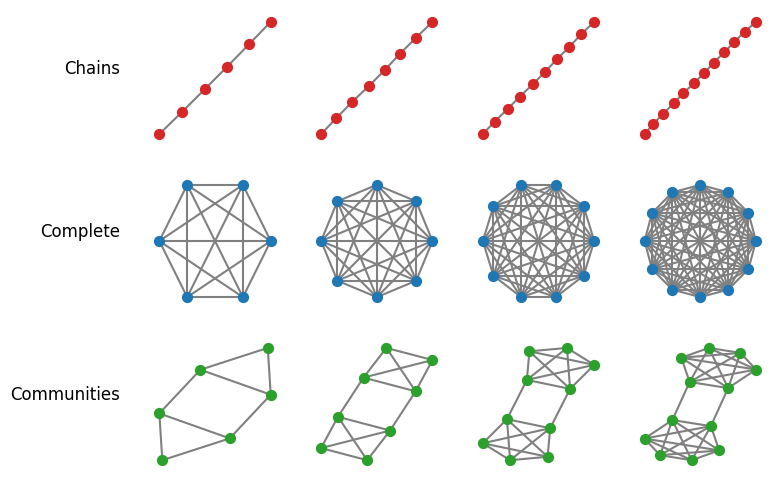

In [3]:
fig, ax = plt.subplots(3, len(num_nodes_range), figsize=(2*len(num_nodes_range), 6))
# fig.tight_layout()

name_color = {'Chains': 'tab:red', 'Complete': 'tab:blue', 'Communities': 'tab:green'}
# name_color = {'Chains': 'black', 'Complete graphs': 'black', 'Communities': 'black'}


for test_index, (name, graph_gen) in enumerate(local_tests):
    ax[test_index, 0].set_ylabel(name, rotation=0, labelpad=20, fontsize=12, ha='right')
 
    for num_nodes_index, num_nodes in enumerate(num_nodes_range):

        if name == 'Communities':
            G = graph_gen(2, num_nodes//2)
        else:
            G = graph_gen(num_nodes)
        
        pos = nx.kamada_kawai_layout(G) # seed=1, k=10, iterations=1000

        # hide subplot axes lines
        for direction in ['top','right','left','bottom']:
            ax[test_index, num_nodes_index].spines[direction].set_visible(False)

        nx.draw_networkx_nodes(G, ax=ax[test_index, num_nodes_index], pos=pos, node_size=50, node_color=name_color[name])
        nx.draw_networkx_edges(G, ax=ax[test_index, num_nodes_index], edge_color='gray', pos=pos, width=1.5)
# nx.draw(G, ax=ax[test_index, num_nodes_index], with_labels=False, node_size=25, edge_color='dimgray', node_color=name_color[name])

utils.save_figure("local_test_illustration", overwrite=True)